# ANLY 561 HW

Name:Yuqi Wang   
NetID:yw545

## Problem 1


C:\Users\45336\Anaconda3\lib\site-packages\ipykernel_launcher.py:77: RuntimeWarning: overflow encountered in exp


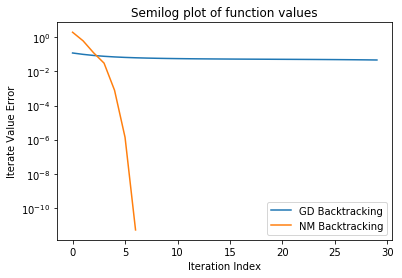

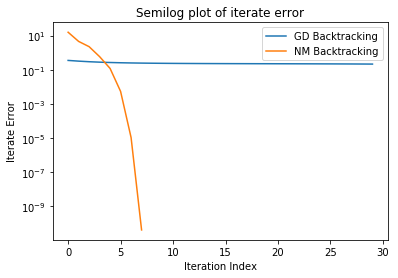

In [8]:
import numpy as np
import matplotlib.pyplot as plt

def backtracking(x0, dx, f, df0, alpha=0.2, beta=0.8, verbose=False):
    '''
    Backtracking for general functions with illustrations
    :param x0: Previous point from backtracking, or initial guess
    :param dx: Incremental factor for updating x0
    :param f: Objective function
    :param df0: Gradient of f at x0
    :param alpha: Sloping factor of stopping criterion
    :param beta: "Agressiveness" parameter for backtracking steps
    :param verbose: Boolean for providing plots and data
    :return: x1, the next iterate in backtracking
    '''

    # Note that the definition below requires that dx and df0 have the same shape
    delta = alpha * np.sum(dx * df0) # A general, but memory intensive inner product
    
    t = 1 # Initialize t=beta^0
    f0 = f(x0) # Evaluate for future use
    x = x0 + dx # Initialize x_{0, inner}
    fx = f(x)
    
    if verbose:
        n=0
        xs = [x]
        fs = [fx]
        ts = [1] * 3
    
    while (not np.isfinite(fx)) or f0 + delta * t < fx:
        t = beta * t
        x = x0 + t * dx
        fx = f(x)
    ###################################### 
    
        if verbose:
            n += 1
            xs.append(x)
            fs.append(fx)
            ts.append(t)
            ts.pop(0)
            
    if verbose:
        # Display the function along the line search direction as a function of t
        s = np.linspace(-0.1*ts[-1], 1.1*ts[0], 100)
        xi = [0, 1.1*ts[0]]
        fxi = [f0, f0 + 1.1*ts[0]*delta]   
        y = np.zeros(len(s))
        
        for i in range(len(s)):
            y[i] = f(x0 + s[i]*dx) # Slow for vectorized functions

        plt.figure('Backtracking illustration')
        arm, =plt.plot(xi, fxi, '--', label='Armijo Criterion')
        fcn, =plt.plot(s, y, label='Objective Function')
        plt.plot([s[0], s[-1]], [0, 0], 'k--')
        pts =plt.scatter(ts, [0 for p in ts], label='Backtracking points for n=%d, %d, %d' % (n, n+1, n+2))
        plt.scatter(ts, [f(x0 + q*dx) for q in ts] , label='Backtracking values for n=%d, %d, %d' % (n, n+1, n+2))
        init =plt.scatter([0], [f0], color='black', label='Initial point')
        plt.xlabel('$t$')
        plt.ylabel('$f(x^{(k)}+t\Delta x^{(k+1)})$')
        plt.legend(handles=[arm, fcn, pts, init])
        plt.show()
        
        return x, xs, fs
    
    else:
        return x


def logistic_objective(x,y):
    N = len(x)
    def fun(beta):
        result = 0
        for i in range(len(x)):
            result += np.log(1 + np.exp(-y[i]*(beta[0]+beta[1]*x[i])))
        return result/N
    return fun


def dlogistic_objective(x,y):
    N = len(x)
    def fun(beta):
        result0 = 0
        result1 = 0
        for i in range(len(x)):
            result0 +=  -y[i]/(np.exp(y[i]*(beta[0]+beta[1]*x[i]))+1)
            result1 +=  -x[i]*y[i]/(np.exp(y[i]*(beta[0]+beta[1]*x[i]))+1)
        return np.array([result0/N,result1/N])
    return fun


def d2logistic_objective(x,y):
    N = len(x)
    def fun(beta):
        result00 = 0
        result11 = 0
        result01 = 0
        for i in range(len(x)):
            result00 += y[i]*y[i]*np.exp(y[i]*(beta[0]+beta[1]*x[i]))/(np.exp(y[i]*(beta[0]+beta[1]*x[i]))+1)**2
            result11 += y[i]*y[i]*x[i]*x[i]*np.exp(y[i]*(beta[0]+beta[1]*x[i]))/(np.exp(y[i]*(beta[0]+beta[1]*x[i]))+1)**2
            result01 += y[i]*y[i]*x[i]*np.exp(y[i]*(beta[0]+beta[1]*x[i]))/(np.exp(y[i]*(beta[0]+beta[1]*x[i]))+1)**2
        return np.array([[result00/N,result01/N],[result01/N,result11/N]])
    return fun

x = np.array([-1,-1,-1,0,0,0,1,1,1,1])
y = np.array([-1,-1,-1,1,-1,1,1,1,1,-1])

fun = logistic_objective(x,y)
dfun = dlogistic_objective(x,y)
d2fun = d2logistic_objective(x,y)

alpha = 0.2
beta = 0.8

iter = 30 # 30 iterations of each
beta0 = np.array([10,10])
'''
backtracking with gradient desent
'''
x_gd_bt = [beta0]
f_gd_bt = [fun(beta0)]
b = beta0
for i in range(iter):
    b = backtracking(b, - dfun(b), fun, dfun(b))
    x_gd_bt.append(b)
    f_gd_bt.append(fun(b))
    
'''
backtracking with Newton's method
'''
x_nm_bt = [beta0]
f_nm_bt = [fun(beta0)]
b = beta0
for i in range(iter):
    b = backtracking(b, - np.linalg.solve(d2fun(b), dfun(b)), fun, dfun(b))
    x_nm_bt.append(b)
    f_nm_bt.append(fun(b))


# Compare convergence of function values with semilog plot
f_gd_bt_error = []
for i in range(len(x_gd_bt)-1):
    f_gd_bt_error.append(np.abs(f_gd_bt[i+1] - f_gd_bt[i]))

f_nm_bt_error = []
for i in range(len(x_nm_bt)-1):
    f_nm_bt_error.append(np.abs(f_nm_bt[i+1] - f_nm_bt[i]))

gd_bt, = plt.semilogy(f_gd_bt_error, label='GD Backtracking')
nm_bt, = plt.semilogy(f_nm_bt_error, label='NM Backtracking')

plt.xlabel('Iteration Index')
plt.ylabel('Iterate Value Error')
plt.legend(handles=[gd_bt, nm_bt])
plt.title('Semilog plot of function values')
plt.show()

# Compare convergece of iterates to the minimizer
x_gd_bt_norm = []
for i in range(len(x_gd_bt)-1):
    x_gd_bt_norm.append(np.linalg.norm(x_gd_bt[i+1] - x_gd_bt[i]))

x_nm_bt_norm = []
for i in range(len(x_nm_bt)-1):
    x_nm_bt_norm.append(np.linalg.norm(x_nm_bt[i+1] - x_nm_bt[i]))

gd_bt, = plt.semilogy(x_gd_bt_norm, label='GD Backtracking')
nm_bt, = plt.semilogy(x_nm_bt_norm, label='NM Backtracking')

plt.xlabel('Iteration Index')
plt.ylabel('Iterate Error')
plt.legend(handles=[gd_bt, nm_bt])
plt.title('Semilog plot of iterate error')
plt.show()



## Problem 2
### Part (a)

$$
\min_{(x,y)\in\mathbb{R}^2} 2x+3y \text{ subject to } -1\leq x \leq 1 \text{ and } -1\leq y\leq 1
$$

$f(x,y)=2x+3y$, $h_1(x,y)=x-1$, $h_2(x,y)=-x-1$, $h_3(x,y)=y-1$, $h_4(x,y)=-y-1$


KKT conditions:  
(Stationarity)   
$\nabla f({\bf x}^\ast) = \begin{pmatrix} 2 \\ 3 \end{pmatrix}$, $\nabla h_1({\bf x}^\ast) = \begin{pmatrix} 1 \\ 0 \end{pmatrix}$, $\nabla h_2({\bf x}^\ast) = \begin{pmatrix} -1 \\ 0 \end{pmatrix}$, $\nabla h_3({\bf x}^\ast) = \begin{pmatrix} 0 \\ 1 \end{pmatrix}$, $\nabla h_4({\bf x}^\ast) = \begin{pmatrix} 0 \\ -1 \end{pmatrix}$, so
$$
-\begin{pmatrix} 2 \\ 3 \end{pmatrix} = \lambda_1\begin{pmatrix} 1 \\ 0 \end{pmatrix}+\lambda_2\begin{pmatrix} -1 \\ 0 \end{pmatrix}+\lambda_3\begin{pmatrix} 0 \\ 1 \end{pmatrix}+\lambda_4\begin{pmatrix} 0 \\ -1 \end{pmatrix}
$$  

(Primal Feasibility)  
$$
h_1({\bf x}^\ast) = x^\ast -1\leq 0,h_2({\bf x}^\ast) = -x^\ast-1\leq 0,
$$
$$
h_3({\bf x}^\ast) = y^\ast -1\leq 0,h_4({\bf x}^\ast) = -y^\ast-1\leq 0
$$

(Dual Feasibility)  
$$
\lambda_1\geq0, \lambda_2\geq0,\lambda_3\geq0, \lambda_4\geq0
$$

(Complementary Slackness)
$$
\lambda_1 h_1({\bf x}^\ast) = \lambda_1(x^\ast -1)=0, \lambda_2 h_2({\bf x}^\ast) = \lambda_2(-x^\ast -1)=0,
$$
$$
\lambda_3 h_3({\bf x}^\ast) = \lambda_3(y^\ast -1)=0, \lambda_4 h_4({\bf x}^\ast) = \lambda_4(-y^\ast -1)=0,
$$

### Part (b)

We have
$$
\begin{pmatrix}
\lambda_1-\lambda_2=-2  &  \lambda_3-\lambda_4=-3 \\
\lambda_1(x^\ast -1)=0  &  \lambda_3(y^\ast -1)=0 \\
\lambda_2(-x^\ast -1)=0  &  \lambda_4(-y^\ast -1)=0
\end{pmatrix}
$$  
From the first column of equations, we get $\lambda_2=\lambda_1+2$, then
$$
(\lambda_1+2)(-x^\ast -1) = 0 \text{ and }\lambda_1(x^\ast -1)=0
$$  
since $\lambda_1\geq0$, and $\lambda_1+2\geq2$, so
$$
(-x^\ast -1) = 0 \implies x^\ast = -1
$$
$$
\lambda_1(x^\ast -1)=0 \implies \lambda_1=0
$$
$$
\lambda_1-\lambda_2=-2 \implies \lambda_2=2
$$  
Similarly, from the second column of equations, we get $\lambda_4=\lambda_3+3$, then
$$
(\lambda_3+3)(-y^\ast -1) = 0 \text{ and }\lambda_3(y^\ast -1)=0
$$  
since $\lambda_3\geq0$, and $\lambda_3+3\geq3$, so
$$
(-y^\ast -1) = 0 \implies y^\ast = -1
$$
$$
\lambda_3(y^\ast -1)=0 \implies \lambda_3=0
$$
$$
\lambda_3-\lambda_4=-3 \implies \lambda_4=3
$$  
Then we have to check the Primal Feasibility,  
$$
h_1({\bf x}^\ast) = -1-1=-2<0,h_2({\bf x}^\ast) = -(-1)-1=0,
$$
$$
h_3({\bf x}^\ast) = -1-1=-2<0,h_4({\bf x}^\ast) = -(-1)-1=0,
$$  
Therefore, by solving the KKT conditions system, we have proved that $(-1,-1)$ is the only point which satisfies the KKT conditions.  
As ${\bf x}^\ast=\begin{pmatrix} 1 \\ 1 \end{pmatrix}$,
We have
$$
\begin{pmatrix}
\lambda_1-\lambda_2=-2  &  \lambda_3-\lambda_4=-3 \\
\lambda_1(x^\ast -1)=0  &  \lambda_3(y^\ast -1)=0 \\
\lambda_2(-x^\ast -1)=0  &  \lambda_4(-y^\ast -1)=0
\end{pmatrix}
$$  
Then we have $\lambda_1=-2,\lambda_2=0,\lambda_3=-3,\lambda_4=0$.  
Check the Stationarity:  
$$
-2\begin{pmatrix} 1 \\ 0 \end{pmatrix}+0\begin{pmatrix} -1 \\ 0 \end{pmatrix}+(-3)\begin{pmatrix} 0 \\ 1 \end{pmatrix}+0\begin{pmatrix} 0 \\ -1 \end{pmatrix} = -\begin{pmatrix} 2 \\ 3 \end{pmatrix}
$$    
Check the Primal Feasibility:    
$$
h_1({\bf x}^\ast) = 1-1=0,h_2({\bf x}^\ast) = -1-1=-2<0,
$$
$$
h_3({\bf x}^\ast) = 1-1=0,h_4({\bf x}^\ast) = -1-1=-2<0,
$$  
Check the Dual Feasibility, however   
$$
\lambda_1=-2<0,\lambda_3=-3<0
$$  
Therefore, $(1,1)$ satisfies all the KKT conditions except dual feasibility.

### Part (c)

As ${\bf x}^\ast = \begin{pmatrix} 0 \\ 0 \end{pmatrix}$, 
$$
h_1({\bf x}^\ast) = 0-1=-1<0,h_2({\bf x}^\ast) = -(0)-1=-1<0,
$$
$$
h_3({\bf x}^\ast) = 0-1=-1<0,h_4({\bf x}^\ast) = -(0)-1=-1<0,
$$
We see that ${\bf x}^\ast = \begin{pmatrix} 0 \\ 0 \end{pmatrix}$ is strictly feasible. So the point $(0,0)$ is an interior point of this program.

C:\Users\45336\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in log
C:\Users\45336\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in log
C:\Users\45336\Anaconda3\lib\site-packages\ipykernel_launcher.py:41: RuntimeWarning: invalid value encountered in log



The process of 10 centering steps:
x:
[array([0, 0]),
 array([-0.64, -0.96]),
 array([-0.61922543, -0.92563064]),
 array([-0.61803746, -0.87080766]),
 array([-0.61803399, -0.80094212]),
 array([-0.61803399, -0.74346044]),
 array([-0.61803399, -0.72255929]),
 array([-0.61803399, -0.72077048]),
 array([-0.61803399, -0.72075922]),
 array([-0.61803399, -0.72075922]),
 array([-0.61803399, -0.72075922])]


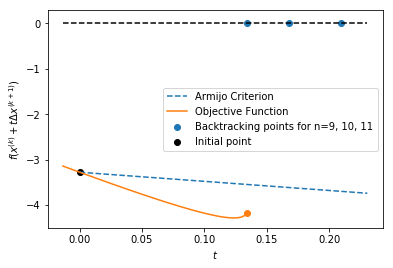

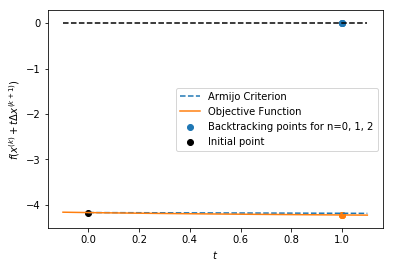

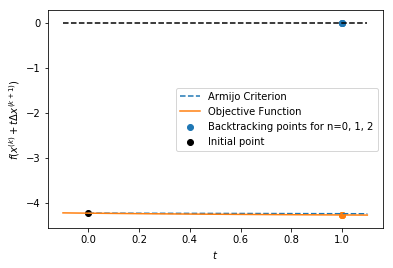

The result for the 1st outer loop:
array([[-0.61803399, -0.9519058 , -0.95125806, -0.95124922],
       [-0.72075922, -0.99608229, -0.99263273, -0.98692108],
       [ 0.        ,  0.        ,  0.        ,  0.        ]])


C:\Users\45336\Anaconda3\lib\site-packages\ipykernel_launcher.py:57: RuntimeWarning: invalid value encountered in log


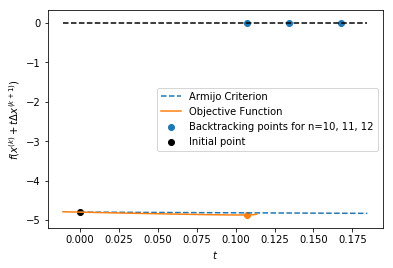

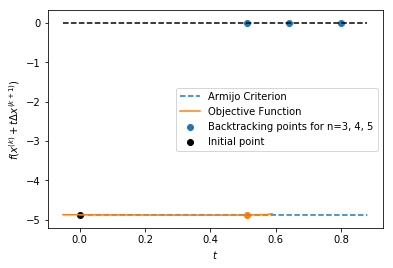

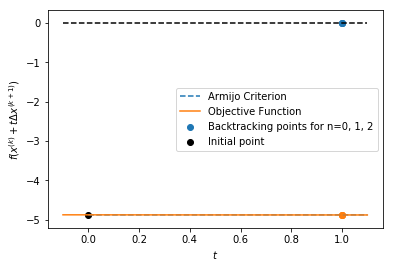

The result for the 2nd outer loop:
array([[-0.95124922, -0.9971547 , -0.99652898, -0.99547359],
       [-0.98692108, -0.99103598, -0.99880923, -0.99804456],
       [ 0.        ,  0.        ,  0.        ,  0.        ]])


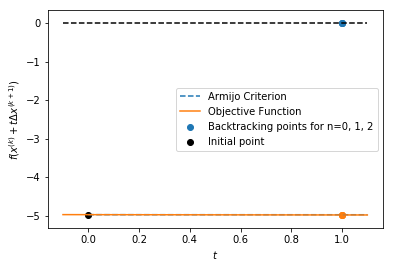

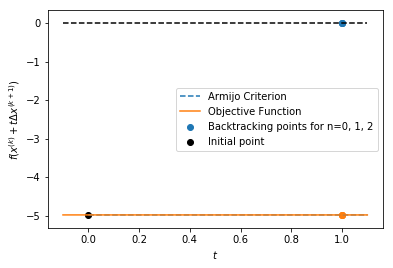

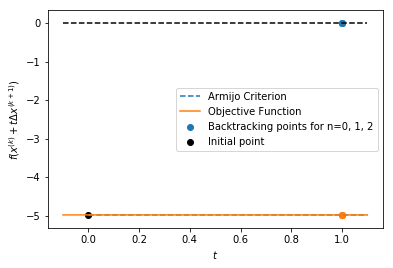

The result for the 3rd outer loop:
array([[-0.99547359, -0.99911963, -0.99918664, -0.99923765],
       [-0.99804456, -0.99899633, -0.99919822, -0.99931093],
       [ 0.        ,  0.        ,  0.        ,  0.        ]])


C:\Users\45336\Anaconda3\lib\site-packages\ipykernel_launcher.py:88: RuntimeWarning: invalid value encountered in log


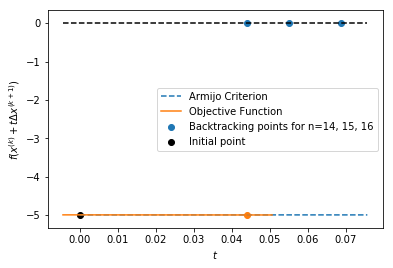

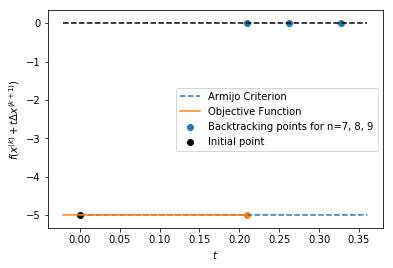

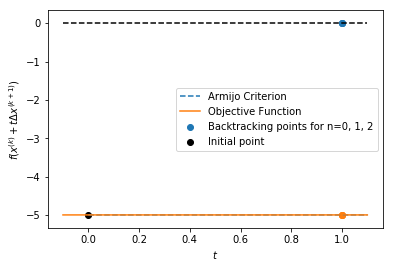

The result for the 4th outer loop:
array([[-0.99923765, -0.99971534, -0.99999552, -0.99999144],
       [-0.99931093, -0.99990712, -0.99994192, -0.99998504],
       [ 0.        ,  0.        ,  0.        ,  0.        ]])


C:\Users\45336\Anaconda3\lib\site-packages\ipykernel_launcher.py:104: RuntimeWarning: invalid value encountered in log


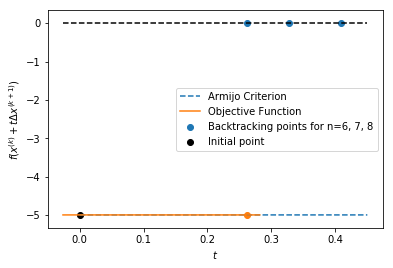

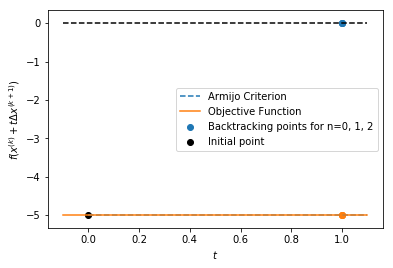

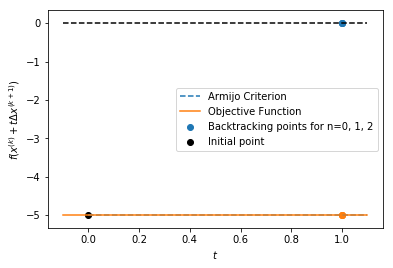

The result for the 5th outer loop:
array([[-0.99999144, -0.99999304, -0.99999577, -0.99999512],
       [-0.99998504, -0.99999871, -0.99999792, -0.99999714],
       [ 0.        ,  0.        ,  0.        ,  0.        ]])


In [9]:
from pprint import pprint

# log barrier
fun = lambda x: 2*x[0]+3*x[1]
dfun = lambda x: np.array([2,3])

h1 = lambda x: x[0]-1
dh1 = lambda x: np.array([1,0])

h2 = lambda x: -x[0]-1
dh2 = lambda x: np.array([-1,0])

h3 = lambda x: x[1]-1
dh3 = lambda x: np.array([0,1])

h4 = lambda x: -x[1]-1
dh4 = lambda x: np.array([0,-1])

lb1 = lambda x: fun(x) - 1*(np.log(-h1(x))+ np.log(-h2(x))+ np.log(-h3(x))+ np.log(-h4(x)))
dlb1 = lambda x: dfun(x) - 1*(dh1(x)/h1(x)+dh2(x)/h2(x)+dh3(x)/h3(x)+dh4(x)/h4(x))
d2lb1 = lambda x: np.array([[0, 0],[0, 0]]) - 1*np.array([-dh1(x)/(h1(x)**2)+dh2(x)/(h2(x)**2),-dh3(x)/(h3(x)**2)+dh4(x)/(h4(x)**2)])

alpha = 0.2
beta = 0.8

# 10 centering steps
x0 = np.array([0, 0])
x_nm_btlb = [x0]

x = x0
for i in range(10):
    x = backtracking(x, - np.linalg.solve(d2lb1(x), dlb1(x)), lb1, dlb1(x))
    x_nm_btlb.append(x)
    
# The process of 10 centering steps
print('\nThe process of 10 centering steps:\nx:')
pprint(x_nm_btlb)


# outer loop 1
lb2 = lambda x: fun(x) - 0.1*(np.log(-h1(x))+ np.log(-h2(x))+ np.log(-h3(x))+ np.log(-h4(x)))
dlb2 = lambda x: dfun(x) - 0.1*(dh1(x)/h1(x)+dh2(x)/h2(x)+dh3(x)/h3(x)+dh4(x)/h4(x))
d2lb2 = lambda x: np.array([[0, 0],[0, 0]]) - 0.1*np.array([-dh1(x)/(h1(x)**2)+dh2(x)/(h2(x)**2),-dh3(x)/(h3(x)**2)+dh4(x)/(h4(x)**2)])

x2 = np.zeros((3, 4))
x2[:2,0] = x_nm_btlb[-1] # initialize at the output of previous step

x2[:2, 1], xs, fs = backtracking(x2[:2, 0], - np.linalg.solve(d2lb2(x2[:2,0]), dlb2(x2[:2,0])), lb2, dlb2(x2[:2,0]), alpha=alpha, beta=beta, verbose=True)
x2[:2, 2], xs, fs = backtracking(x2[:2, 1], - np.linalg.solve(d2lb2(x2[:2,1]), dlb2(x2[:2,1])), lb2, dlb2(x2[:2,1]), alpha=alpha, beta=beta, verbose=True)
x2[:2, 3], xs, fs = backtracking(x2[:2, 2], - np.linalg.solve(d2lb2(x2[:2,2]), dlb2(x2[:2,2])), lb2, dlb2(x2[:2,2]), alpha=alpha, beta=beta, verbose=True)

print('The result for the 1st outer loop:')
pprint(x2)


# outer loop 2
lb3 = lambda x: fun(x) - 0.01*(np.log(-h1(x))+ np.log(-h2(x))+ np.log(-h3(x))+ np.log(-h4(x)))
dlb3 = lambda x: dfun(x) - 0.01*(dh1(x)/h1(x)+dh2(x)/h2(x)+dh3(x)/h3(x)+dh4(x)/h4(x))
d2lb3 = lambda x: np.array([[0, 0],[0, 0]]) - 0.01*np.array([-dh1(x)/(h1(x)**2)+dh2(x)/(h2(x)**2),-dh3(x)/(h3(x)**2)+dh4(x)/(h4(x)**2)])

x3 = np.zeros((3, 4))
x3[:2,0] = x2[:2, 3] # initialize at the output of previous step

x3[:2, 1], xs, fs = backtracking(x3[:2, 0], - np.linalg.solve(d2lb3(x3[:2,0]), dlb3(x3[:2,0])), lb3, dlb3(x3[:2,0]), alpha=alpha, beta=beta, verbose=True)
x3[:2, 2], xs, fs = backtracking(x3[:2, 1], - np.linalg.solve(d2lb3(x3[:2,1]), dlb3(x3[:2,1])), lb3, dlb3(x3[:2,1]), alpha=alpha, beta=beta, verbose=True)
x3[:2, 3], xs, fs = backtracking(x3[:2, 2], - np.linalg.solve(d2lb3(x3[:2,2]), dlb3(x3[:2,2])), lb3, dlb3(x3[:2,2]), alpha=alpha, beta=beta, verbose=True)

print('The result for the 2nd outer loop:')
pprint(x3)

# outer loop 3
lb4 = lambda x: fun(x) - 0.001*(np.log(-h1(x))+ np.log(-h2(x))+ np.log(-h3(x))+ np.log(-h4(x)))
dlb4 = lambda x: dfun(x) - 0.001*(dh1(x)/h1(x)+dh2(x)/h2(x)+dh3(x)/h3(x)+dh4(x)/h4(x))
d2lb4 = lambda x: np.array([[0, 0],[0, 0]]) - 0.01*np.array([-dh1(x)/(h1(x)**2)+dh2(x)/(h2(x)**2),-dh3(x)/(h3(x)**2)+dh4(x)/(h4(x)**2)])

x4 = np.zeros((3, 4))
x4[:2,0] = x3[:2, 3] # initialize at the output of previous step

x4[:2, 1], xs, fs = backtracking(x4[:2, 0], - np.linalg.solve(d2lb4(x4[:2,0]), dlb4(x4[:2,0])), lb4, dlb4(x4[:2,0]), alpha=alpha, beta=beta, verbose=True)
x4[:2, 2], xs, fs = backtracking(x4[:2, 1], - np.linalg.solve(d2lb4(x4[:2,1]), dlb4(x4[:2,1])), lb4, dlb4(x4[:2,1]), alpha=alpha, beta=beta, verbose=True)
x4[:2, 3], xs, fs = backtracking(x4[:2, 2], - np.linalg.solve(d2lb4(x4[:2,2]), dlb4(x4[:2,2])), lb4, dlb4(x4[:2,2]), alpha=alpha, beta=beta, verbose=True)

print('The result for the 3rd outer loop:')
pprint(x4)


# outer loop 4
lb5 = lambda x: fun(x) - 0.0001*(np.log(-h1(x))+ np.log(-h2(x))+ np.log(-h3(x))+ np.log(-h4(x)))
dlb5 = lambda x: dfun(x) - 0.0001*(dh1(x)/h1(x)+dh2(x)/h2(x)+dh3(x)/h3(x)+dh4(x)/h4(x))
d2lb5 = lambda x: np.array([[0, 0],[0, 0]]) - 0.0001*np.array([-dh1(x)/(h1(x)**2)+dh2(x)/(h2(x)**2),-dh3(x)/(h3(x)**2)+dh4(x)/(h4(x)**2)])

x5 = np.zeros((3, 4))
x5[:2,0] = x4[:2, 3] # initialize at the output of previous step

x5[:2, 1], xs, fs = backtracking(x5[:2, 0], - np.linalg.solve(d2lb5(x5[:2,0]), dlb5(x5[:2,0])), lb5, dlb5(x5[:2,0]), alpha=alpha, beta=beta, verbose=True)
x5[:2, 2], xs, fs = backtracking(x5[:2, 1], - np.linalg.solve(d2lb5(x5[:2,1]), dlb5(x5[:2,1])), lb5, dlb5(x5[:2,1]), alpha=alpha, beta=beta, verbose=True)
x5[:2, 3], xs, fs = backtracking(x5[:2, 2], - np.linalg.solve(d2lb5(x5[:2,2]), dlb5(x5[:2,2])), lb5, dlb5(x5[:2,2]), alpha=alpha, beta=beta, verbose=True)

print('The result for the 4th outer loop:')
pprint(x5)


# outer loop 5
lb6 = lambda x: fun(x) - 0.00001*(np.log(-h1(x))+ np.log(-h2(x))+ np.log(-h3(x))+ np.log(-h4(x)))
dlb6 = lambda x: dfun(x) - 0.00001*(dh1(x)/h1(x)+dh2(x)/h2(x)+dh3(x)/h3(x)+dh4(x)/h4(x))
d2lb6 = lambda x: np.array([[0, 0],[0, 0]]) - 0.00001*np.array([-dh1(x)/(h1(x)**2)+dh2(x)/(h2(x)**2),-dh3(x)/(h3(x)**2)+dh4(x)/(h4(x)**2)])

x6 = np.zeros((3, 4))
x6[:2,0] = x5[:2, 3] # initialize at the output of previous step

x6[:2, 1], xs, fs = backtracking(x6[:2, 0], - np.linalg.solve(d2lb6(x6[:2,0]), dlb6(x6[:2,0])), lb6, dlb6(x6[:2,0]), alpha=alpha, beta=beta, verbose=True)
x6[:2, 2], xs, fs = backtracking(x6[:2, 1], - np.linalg.solve(d2lb6(x6[:2,1]), dlb6(x6[:2,1])), lb6, dlb6(x6[:2,1]), alpha=alpha, beta=beta, verbose=True)
x6[:2, 3], xs, fs = backtracking(x6[:2, 2], - np.linalg.solve(d2lb6(x6[:2,2]), dlb6(x6[:2,2])), lb6, dlb6(x6[:2,2]), alpha=alpha, beta=beta, verbose=True)

print('The result for the 5th outer loop:')
pprint(x6)


## Problem 3

Given that
$$
\nabla f({\bf x}) = \begin{pmatrix}
\frac{\partial f}{\partial x_1}({\bf x}) \\
\frac{\partial f}{\partial x_2}({\bf x}) \\
\vdots \\
\frac{\partial f}{\partial x_n}({\bf x})
\end{pmatrix}
$$
Prove that
$$
\nabla(g \circ f)({\bf x}) = g'(f({\bf x}))\nabla f({\bf x})
$$

**PROOF: **  
$$
\nabla (g \circ f)({\bf x}) = 
\begin{pmatrix}
\frac{\partial (g \circ f)}{\partial x_1}({\bf x}) \\ 
\frac{\partial (g \circ f)}{\partial x_2}({\bf x}) \\
\vdots \\
\frac{\partial (g \circ f)}{\partial x_n}({\bf x})
\end{pmatrix}=\begin{pmatrix}
\frac{\partial g}{\partial f}(f({\bf x})) \frac{\partial f}{\partial x_1}({\bf x}) \\ 
\frac{\partial g}{\partial f}(f({\bf x})) \frac{\partial f}{\partial x_2}({\bf x}) \\
\vdots \\
\frac{\partial g}{\partial f}(f({\bf x})) \frac{\partial f}{\partial x_n}({\bf x})
\end{pmatrix} \text{ (Using the chain rule) }
$$
Since function $g: \mathbb{R}\rightarrow\mathbb{R}$, so $\frac{\partial g}{\partial f}(f({\bf x}))=\frac{dg}{df}(f({\bf x})) = g'(f({\bf x}))$. Then,
$$
\nabla (g \circ f)({\bf x}) = 
g'(f({\bf x}))\begin{pmatrix}
\frac{\partial f}{\partial x_1}({\bf x}) \\
\frac{\partial f}{\partial x_2}({\bf x}) \\
\vdots \\
\frac{\partial f}{\partial x_n}({\bf x})
\end{pmatrix}=g'(f({\bf x}))\nabla f({\bf x})
$$


## Problem 4
### Part (a)
**PROOF: **  
$$
\nabla f_i({\bf x}) = \begin{pmatrix}
\frac{\partial f_i}{\partial x_1}({\bf x}) \\ 
\frac{\partial f_i}{\partial x_2}({\bf x}) \\
\vdots \\
\frac{\partial f_i}{\partial x_n}({\bf x})
\end{pmatrix}
$$  
And  
$$
\nabla f_i({\bf x})^T = \begin{pmatrix}
\frac{\partial f_i}{\partial x_1}({\bf x}) &
\frac{\partial f_i}{\partial x_2}({\bf x}) &
\cdots &
\frac{\partial f_i}{\partial x_n}({\bf x})
\end{pmatrix}
$$  
Since  
$$
Df({\bf x}) = \begin{pmatrix}
\frac{\partial f_1}{\partial x_1}({\bf x}) & \frac{\partial f_1}{\partial x_2}({\bf x}) & \cdots & \frac{\partial f_1}{\partial x_n}({\bf x})\\
\frac{\partial f_2}{\partial x_1}({\bf x}) & \frac{\partial f_2}{\partial x_2}({\bf x}) & \cdots & \frac{\partial f_2}{\partial x_n}({\bf x})\\
\vdots & \vdots & \ddots & \vdots\\
\frac{\partial f_m}{\partial x_1}({\bf x}) & \frac{\partial f_m}{\partial x_2}({\bf x}) & \cdots & \frac{\partial f_m}{\partial x_n}({\bf x})
\end{pmatrix}
$$  
Obviously, the $i$th row of $Df({\bf x})$ is simply $\nabla f_i({\bf x})^T$ for all $i=1,\cdots,m$ so that  
$$
Df({\bf x}) = \begin{pmatrix}
\nabla f_1({\bf x})^T \\ 
\nabla f_2({\bf x})^T \\
\vdots \\
\nabla f_m({\bf x})^T
\end{pmatrix}
$$

### Part (b)
**PROOF: **  
At first,  
$$
\frac{\partial (g \circ f)}{\partial x_1}({\bf x}) = \frac{\partial g}{\partial f_1}(f_1({\bf x}))\frac{\partial f_1}{\partial x_1}({\bf x}) +\frac{\partial g}{\partial f_2}(f_2({\bf x}))\frac{\partial f_2}{\partial x_1}({\bf x})+\cdots+\frac{\partial g}{\partial f_m}(f_m({\bf x}))\frac{\partial f_m}{\partial x_1}({\bf x})
$$  
$$
=\begin{pmatrix}
\frac{\partial g}{\partial f_1}(f_1({\bf x})) & \frac{\partial g}{\partial f_2}(f_2({\bf x})) & \cdots & \frac{\partial g}{\partial f_m}(f_m({\bf x}))
\end{pmatrix}\begin{pmatrix} 
\frac{\partial f_1}{\partial x_1}({\bf x}) \\ 
\frac{\partial f_2}{\partial x_1}({\bf x}) \\
\vdots \\
\frac{\partial f_m}{\partial x_1}({\bf x})
\end{pmatrix} 
$$  
$$
=(\nabla g(f({\bf x})))^T\left(\frac{\partial f}{\partial x_1}({\bf x})\right)=\left(\frac{\partial f}{\partial x_1}({\bf x})\right)^T \nabla g(f({\bf x}))
$$  
Then   
$$
\nabla (g \circ f)({\bf x}) = \begin{pmatrix} 
\frac{\partial (g \circ f)}{\partial x_1}({\bf x}) \\ 
\frac{\partial (g \circ f)}{\partial x_2}({\bf x}) \\
\vdots \\
\frac{\partial (g \circ f)}{\partial x_n}({\bf x})
\end{pmatrix}=\begin{pmatrix} 
\left(\frac{\partial f}{\partial x_1}({\bf x})\right)^T \nabla g(f({\bf x})) \\ 
\left(\frac{\partial f}{\partial x_2}({\bf x})\right)^T \nabla g(f({\bf x})) \\
\vdots \\
\left(\frac{\partial f}{\partial x_n}({\bf x})\right)^T \nabla g(f({\bf x})))
\end{pmatrix}=\begin{pmatrix} 
\left(\frac{\partial f}{\partial x_1}({\bf x})\right)^T \\ 
\left(\frac{\partial f}{\partial x_2}({\bf x})\right)^T \\
\vdots \\
\left(\frac{\partial f}{\partial x_n}({\bf x})\right)^T 
\end{pmatrix} \nabla g(f({\bf x}))
$$  
$$
= \begin{pmatrix}
\frac{\partial f_1}{\partial x_1}({\bf x}) & \frac{\partial f_2}{\partial x_1}({\bf x}) & \cdots & \frac{\partial f_m}{\partial x_1}({\bf x})\\
\frac{\partial f_1}{\partial x_2}({\bf x}) & \frac{\partial f_2}{\partial x_2}({\bf x}) & \cdots & \frac{\partial f_m}{\partial x_2}({\bf x})\\
\vdots & \vdots & \ddots & \vdots\\
\frac{\partial f_1}{\partial x_n}({\bf x}) & \frac{\partial f_2}{\partial x_n}({\bf x}) & \cdots & \frac{\partial f_m}{\partial x_n}({\bf x})
\end{pmatrix} \nabla g(f({\bf x})) = Df({\bf x})^T\nabla g(f({\bf x}))
$$  


### Part (c)
**PROOF: **  
We have $f: \mathbb{R}^n\rightarrow\mathbb{R}^k$, $g: \mathbb{R}^k\rightarrow\mathbb{R}^m$, so $g\circ f: \mathbb{R}^n\rightarrow\mathbb{R}^m$, so the number of $f_i$ is $k$ and the number of $g_i$ is $m$.  

$$
D(g\circ f)({\bf x}) = \begin{pmatrix}
\frac{\partial (g_1\circ f)}{\partial x_1}({\bf x}) & \frac{\partial (g_1\circ f)}{\partial x_2}({\bf x}) & \cdots & \frac{\partial (g_1\circ f)}{\partial x_n}({\bf x})\\
\frac{\partial (g_2\circ f)}{\partial x_1}({\bf x}) & \frac{\partial (g_2\circ f)}{\partial x_2}({\bf x}) & \cdots & \frac{\partial (g_2\circ f)}{\partial x_n}({\bf x})\\
\vdots & \vdots & \ddots & \vdots\\
\frac{\partial (g_m\circ f)}{\partial x_1}({\bf x}) & \frac{\partial (g_m\circ f)}{\partial x_2}({\bf x}) & \cdots & \frac{\partial (g_m\circ f)}{\partial x_n}({\bf x})
\end{pmatrix}
$$  
We will first focus on one single element in this matrix,  
$$
\frac{\partial (g_1\circ f)}{\partial x_1}({\bf x}) = \frac{\partial g_1}{\partial f_1}(f_1({\bf x}))\frac{\partial f_1}{\partial x_1}({\bf x}) +\frac{\partial g}{\partial f_2}(f_2({\bf x}))\frac{\partial f_2}{\partial x_1}({\bf x})+\cdots+\frac{\partial g_1}{\partial f_k}(f_k({\bf x}))\frac{\partial f_k}{\partial x_1}({\bf x})
$$  
$$
=\begin{pmatrix}
\frac{\partial g_1}{\partial f_1}(f_1({\bf x})) & \frac{\partial g_1}{\partial f_2}(f_2({\bf x})) & \cdots & \frac{\partial g_1}{\partial f_k}(f_k({\bf x}))
\end{pmatrix}\begin{pmatrix} 
\frac{\partial f_1}{\partial x_1}({\bf x}) \\ 
\frac{\partial f_2}{\partial x_1}({\bf x}) \\
\vdots \\
\frac{\partial f_k}{\partial x_1}({\bf x})
\end{pmatrix} =(\nabla g_1(f({\bf x})))^T\left(\frac{\partial f}{\partial x_1}({\bf x})\right)
$$  
So   
$$
D(g\circ f)({\bf x}) = \begin{pmatrix}
(\nabla g_1(f({\bf x})))^T\left(\frac{\partial f}{\partial x_1}({\bf x})\right) & (\nabla g_1(f({\bf x})))^T\left(\frac{\partial f}{\partial x_2}({\bf x})\right) & \cdots & (\nabla g_1(f({\bf x})))^T\left(\frac{\partial f}{\partial x_n}({\bf x})\right) \\
(\nabla g_2(f({\bf x})))^T\left(\frac{\partial f}{\partial x_1}({\bf x})\right) & (\nabla g_2(f({\bf x})))^T\left(\frac{\partial f}{\partial x_2}({\bf x})\right) & \cdots & (\nabla g_2(f({\bf x})))^T\left(\frac{\partial f}{\partial x_n}({\bf x})\right) \\
\vdots & \vdots & \ddots & \vdots\\
(\nabla g_m(f({\bf x})))^T\left(\frac{\partial f}{\partial x_1}({\bf x})\right) & (\nabla g_m(f({\bf x})))^T\left(\frac{\partial f}{\partial x_2}({\bf x})\right) & \cdots & (\nabla g_m(f({\bf x})))^T\left(\frac{\partial f}{\partial x_n}({\bf x})\right) \\
\end{pmatrix}
$$

$$
Dg(f({\bf x}))Df({\bf x})=\begin{pmatrix}
\frac{\partial g_1}{\partial f_1}(f_1({\bf x})) & \frac{\partial g_1}{\partial f_2}(f_2({\bf x}))  & \cdots & \frac{\partial g_1}{\partial f_k}(f_k({\bf x})) \\
\frac{\partial g_2}{\partial f_1}(f_1({\bf x})) & \frac{\partial g_2}{\partial f_2}(f_2({\bf x}))  & \cdots & \frac{\partial g_2}{\partial f_k}(f_k({\bf x})) \\
\vdots & \vdots & \ddots & \vdots\\
\frac{\partial g_m}{\partial f_1}(f_1({\bf x})) & \frac{\partial g_m}{\partial f_2}(f_2({\bf x}))  & \cdots & \frac{\partial g_m}{\partial f_k}(f_k({\bf x})) \\
\end{pmatrix}\begin{pmatrix}
\frac{\partial f_1}{\partial x_1}({\bf x}) & \frac{\partial f_1}{\partial x_2}({\bf x}) & \cdots & \frac{\partial f_1}{\partial x_n}({\bf x})\\
\frac{\partial f_2}{\partial x_1}({\bf x}) & \frac{\partial f_2}{\partial x_2}({\bf x}) & \cdots & \frac{\partial f_2}{\partial x_n}({\bf x})\\
\vdots & \vdots & \ddots & \vdots\\
\frac{\partial f_k}{\partial x_1}({\bf x}) & \frac{\partial f_k}{\partial x_2}({\bf x}) & \cdots & \frac{\partial f_k}{\partial x_n}({\bf x})
\end{pmatrix}
$$  
We observe that the $i$th row of $Dg(f({\bf x}))$ is just $(\nabla g_i(f({\bf x})))^T$ for all $i=1,2,\cdots,m$, and the $j$th column of $Df({\bf x})$ is just $\frac{\partial f}{\partial x_j}({\bf x})$ for all $j=1,2,\cdots,n$, thus  
$$
Dg(f({\bf x}))Df({\bf x})=\begin{pmatrix}
(\nabla g_1(f({\bf x})))^T \\
(\nabla g_2(f({\bf x})))^T \\
\vdots \\
(\nabla g_m(f({\bf x})))^T \\
\end{pmatrix}\begin{pmatrix}
\frac{\partial f}{\partial x_1}({\bf x}) & \frac{\partial f}{\partial x_2}({\bf x}) & \cdots & \frac{\partial f}{\partial x_n}({\bf x})
\end{pmatrix}
$$   
$$
= \begin{pmatrix}
(\nabla g_1(f({\bf x})))^T\left(\frac{\partial f}{\partial x_1}({\bf x})\right) & (\nabla g_1(f({\bf x})))^T\left(\frac{\partial f}{\partial x_2}({\bf x})\right) & \cdots & (\nabla g_1(f({\bf x})))^T\left(\frac{\partial f}{\partial x_n}({\bf x})\right) \\
(\nabla g_2(f({\bf x})))^T\left(\frac{\partial f}{\partial x_1}({\bf x})\right) & (\nabla g_2(f({\bf x})))^T\left(\frac{\partial f}{\partial x_2}({\bf x})\right) & \cdots & (\nabla g_2(f({\bf x})))^T\left(\frac{\partial f}{\partial x_n}({\bf x})\right) \\
\vdots & \vdots & \ddots & \vdots\\
(\nabla g_m(f({\bf x})))^T\left(\frac{\partial f}{\partial x_1}({\bf x})\right) & (\nabla g_m(f({\bf x})))^T\left(\frac{\partial f}{\partial x_2}({\bf x})\right) & \cdots & (\nabla g_m(f({\bf x})))^T\left(\frac{\partial f}{\partial x_n}({\bf x})\right) \\
\end{pmatrix}
$$  
Therefore, $D(g\circ f)({\bf x})=Dg(f({\bf x}))Df({\bf x})$.